#### Chapter 2 Supervised Learning

**2.3 Supervised Learning Algorithm**

In [3]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582711 sha256=ff1ffceb8194ac5ce77743864789b7844d467bc5903c39e76a6acde544d4da55
  Stored in directory: c:\users\kh_le\appdata\local\pip\cache\wheels\58\01\29\2ff749b641757ff133833c59a56c88ef6a5f966050db2d31fe
Successfully built mglearn


X.shape: (26, 2)


C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


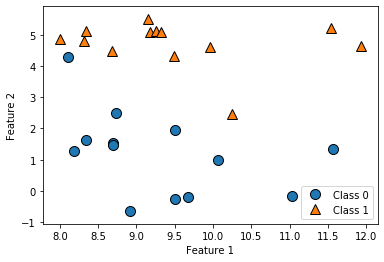

In [5]:
import mglearn
import matplotlib.pyplot as plt

# 두개의 특성을 가진 forge 데이터셋은, 인위적으로 만든 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge()

# Make Scattar Plot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 이 데이터셋은, 데이터 포인트 26개와 특성 2개를 가진다.
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

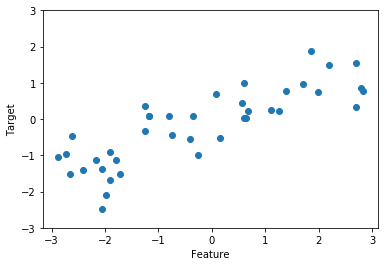

In [6]:
# Regression은, 인위적으로 만든 wave 데이터셋을 이용
# wave 데이터셋은 입력 특성 하나와, 모델링할 타깃 변수(또는 응답 변수)를 가진다.

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

**2.3.1 예제에 사용할 데이터셋**

In [7]:
# Wisconsin Breast Cancer
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print("Shape of Breast Cancer Inputs: {}".format(cancer.data.shape))

Shape of Breast Cancer Inputs: (569, 30)


In [10]:
import numpy as np

print("Class별 샘플 개수: {}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Class별 샘플 개수: {'malignant': 212, 'benign': 357}


In [11]:
# cf) Zip function

a = [1, 2, 3, 4, 5]
b = ['a', 'b', 'c', 'd', 'e']

for x, y in zip(a, b):
    print(x, y)

1 a
2 b
3 c
4 d
5 e


In [13]:
print("Features Name: \n{}".format(cancer.feature_names))

Features Name: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
# Boston Housing
from sklearn.datasets import load_boston
boston = load_boston()
print("Data Shape: {}".format(boston.data.shape))

Data Shape: (506, 13)


In [15]:
# Boston Housing의 Feature를 상호간으로 곱하여 의도적으로 확장시킨 데이터 셋
X, y = mglearn.datasets.load_extended_boston()

print("X shape: {}".format(X.shape))

X shape: (506, 104)


**2.3.2 K-Nearest Neighbors**

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


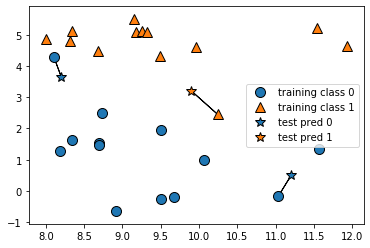

In [16]:
# forge데이터셋에 대한 1-최근접이웃 모델의 예측

mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


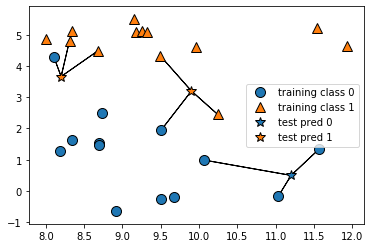

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
# forge data에 대한 test split
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
print("Test Set Prediction: {}".format(clf.predict(X_test)))

Test Set Prediction: [1 0 1 0 1 0 0]


In [23]:
print("Test Set Accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test Set Accuracy: 0.86


**KNeighborsClassifier 분석**

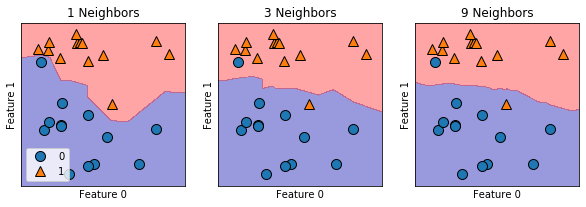

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit method는 self 객체를 반환
    # 그래서 객체 생성과 fit method를 한줄에 작성 가능
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} Neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

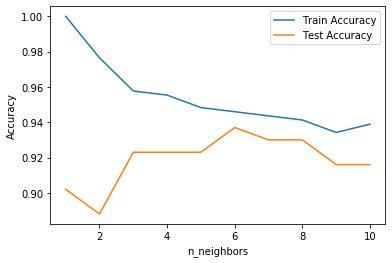

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # Set Model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='Train Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

- knn regression

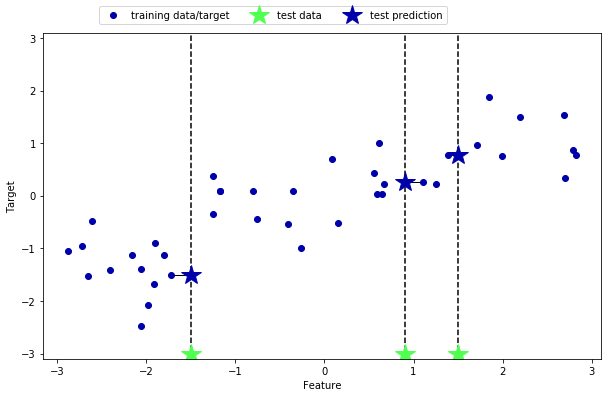

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

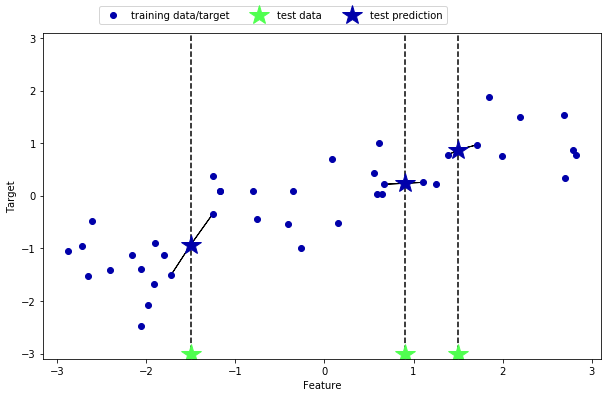

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

In [38]:
# wave Regression with knn algorithm
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave Dataset을 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여, 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용, 모델 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [40]:
print("Test Set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test Set R^2: 0.83


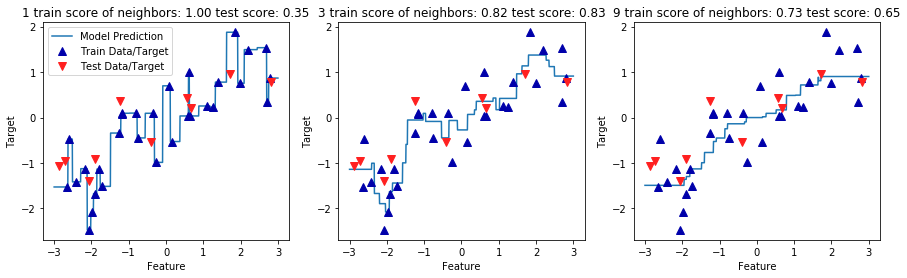

In [43]:
# KNeighborsRegressor Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3~3 사이에, 1,000개의 데이터 포인트를 생성
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 한다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} train score of neighbors: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), 
                                                               reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model Prediction", "Train Data/Target", "Test Data/Target"], loc="best")

#### 장단점과 매개변수

- 일반적으로 KNeighbors Classifier의 중요 매개 변수는, 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수.
- 대개, 유클리디안 거리 방식 사용
- k-NN은 이해하기 쉬운 모델
- 그러나, 사용할때 데이터 전처리가 매우 중요. 이웃간의 거리를 계산할 때, 특성마다 그 값의 범위가 다르면 범위가 적은 특성에 크게 영향을 받음.
- 따라서, 스케일을 갖도록 정규화해야함.
- 많은 데이터 특성을 가진 경우에는 잘 작동하지 않으며, 특성 값 대부분이 0인 (즉, 희소한) 데이터셋과는 특히 잘 작동하지 않음.